<a href="https://colab.research.google.com/github/Raspiani/FGA-DATA-SCIENTIST-KOMINFO-2020/blob/main/Raspiani_Project_UTS_FGA_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- ### Notes  
  Metodologi Data Science

1. Business Understanding

2. Analytics Approach 

3. Data Requirements 

4. Data Collection 

5. Data Understanding

6. Data Preparation & Data Visualization (Exploratory Data Analysis)

7. Modelling

8. Evaluation 

9. Deployment

10. Feedback

  Pertanyaan Data Scientist:
  - Adakah tipe variabel yang kurang tepat di data tersebut?
  - Apakah data numeriknya cenderung berdistribusi normal?
  - Apakah ada outlier, noise, missing values dan atau duplikasi data?
  - Apakah pelanggan pria dan wanita cenderung proporsional (balance)?
  - Dari data yang ada apakah pria atau wanita ada kecenderungan memberi tips lebih besar ?
  - Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu ?
  - Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?
  - Apakah pola di nomor 5 dan 7 dipengaruhi hari?
  - Pola apalagi yang dapat anda temukan ? (misal: bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)
  - Final Question: dari hasil EDA anda, saran apa saja yang akan anda berikan ke pemilik restaurant?
 -->


# <center> **Get Insight from Restaurant Data**
## <center> by: Raspiani


---

Skenario: 



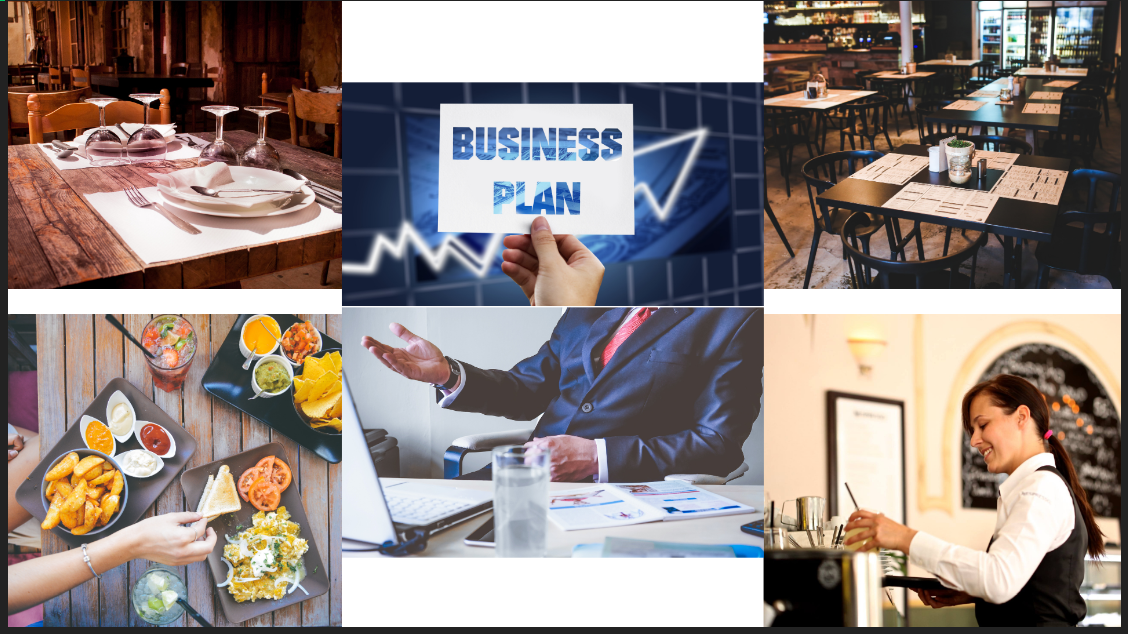

# Business Understanding

Pertanyaan Bisnis:
- Pemilik Restaurant ingin meningkatkan profit bisnisnya, oleh karena itu ia membutuhkan beberapa rekomendasi yang dapat meningkatkan bisnis restaurant nya?
- Pemilik Restaurant juga ingin mengetahui berapakah tip yang diberikan oleh pelanggannya kepada pelayannya pada waktu tertentu?

Informasi Bisnis:
- Restaurant buka pada hari kamis, jumat, sabtu dan minggu.

# Analytics Approach

Pendekatan solusi bisnis yang diambil yaitu:

- Rekomendasi Bisnis
- Prediksi tip (Supervised Learning: Regresi) [Untuk Project ML]

# Data Collection

Sumber Data: 
- Dataset sudah ada di dalam modul seaborn

Meta Data:
- Jumlah Baris = 244
- Jumlah Kolom/Variabel = 7

In [68]:
# Importing Some Python Modules
import warnings; warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.style.use('bmh'); sns.set()

In [69]:
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Data Understanding dan Data Preparation for Data Visualization

Tipe Data:

Variabel Numerik
- total_bill:     float64
- tip:         float64
- size:             int64

Variabel Kategorik
- sex:         category
- smoker:       category
- day:        category
- time:          category

<!-- - Ada berapa baris dan kolom?
- Seperti apa type datanya?
- Seperti apa distribusi datanya?
- Adakah outlier?
- Adakah Missing value?
- Adakah duplikat data? -->

In [70]:
#melihat info data
tips.info()

#result: tipe data sudah sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


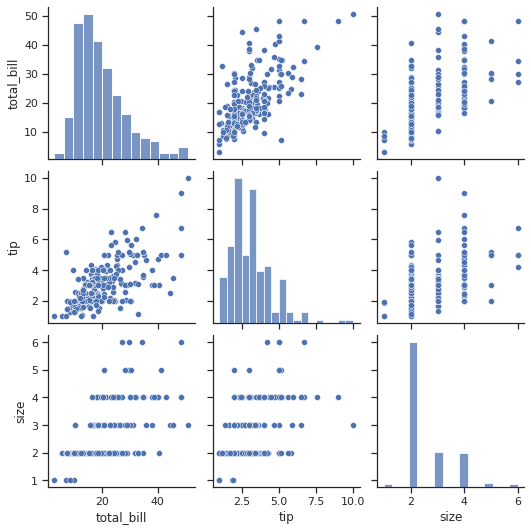

In [71]:
#membuat pairwise plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(tips)

In [72]:
data_num = tips.select_dtypes(include=['int64', 'float64'])
data_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [73]:
data_cat = tips.select_dtypes(include=['category'])
data_cat.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


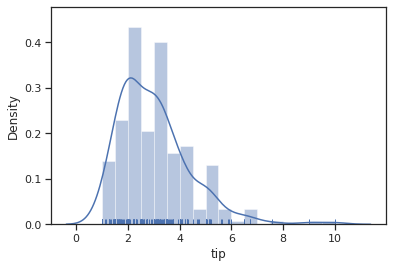

In [74]:
# Distributions
p = sns.distplot(tips['tip'], kde=True, rug=True)

## Cek Outlier

In [75]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "tip"

df = np.abs(tips.tip - tips.tip.mean())<=(2*tips.tip.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(244,)


0    True
1    True
2    True
3    True
4    True
Name: tip, dtype: bool

In [76]:
tips2 = tips[df] # Data tanpa outliers
print(tips2.shape, tips.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "tips2"
# Jika datanya besar hati-hati melakukan hal ini

(234, 7) (244, 7)


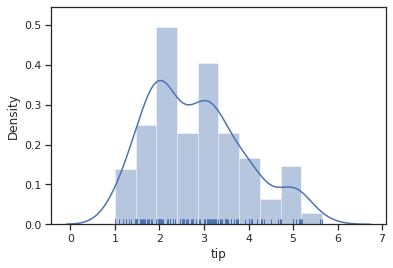

In [77]:
# Distributions
p = sns.distplot(tips2['tip'], kde=True, rug=True)

## Cek Missing Value

In [78]:
#memeriksa missing value secara keseluruhan
tips2.isnull().any().any()

False

In [79]:
#memeriksa missing value dengan melihat jumlahnya pada kolomnya masing-masing
tips2.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Cek Duplikasi Data

In [80]:
#mengecek apakah ada duplikat data?
print(tips2.shape)
tips2.duplicated().sum()

(234, 7)


1

In [81]:
#menghapus entri yang memiliki data duplikat 
tips2.drop_duplicates(inplace=True)
print(tips2.duplicated().sum()) # no more duplicates
print(tips2.shape) # re-check by printing data size

0
(233, 7)


## Statistika Deskriptif

Diperoleh hasil:
- Tip yang paling kecil diberikan pelanggan yaitu 1 dollar
- Tip yang paling besar diberikan pelanggan yaitu 5.65 dollar
- Rata-rata tip yang diberikan pelanggan yaitu 2.82 dollar
- waktu yang paling banyak pengunjung yaitu dinner
- hari yang paling banyak pengunjung yaitu saturday (sabtu)

In [82]:
#statistika deskriptif
tips2.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,233.000000,233.000000,233,233,233,233,233.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,148,144,81,168,NaN
mean,19.125150,2.827468,NaN,NaN,NaN,NaN,2.523605
std,8.193608,1.085860,NaN,NaN,NaN,NaN,0.919427
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.270000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.460000,2.740000,NaN,NaN,NaN,NaN,2.000000
75%,23.100000,3.500000,NaN,NaN,NaN,NaN,3.000000


In [83]:
tips2.sample(5)

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
115,17.31,3.50,Female,No,Sun,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
199,13.51,2.00,Male,Yes,Thur,Lunch,2
168,10.59,1.61,Female,Yes,Sat,Dinner,2


# Data Visualization

## Sebaran pelanggan restaurant secara keseluruhan

Diperoleh hasil bahwa pelanggan yang datang ke restaurant didominasi oleh golongan laki-laki.

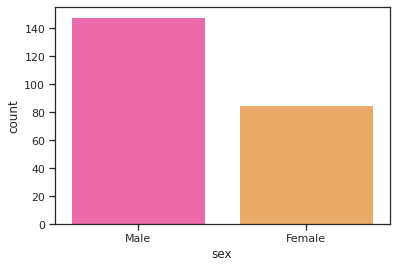

In [84]:
p = sns.countplot(tips2.sex, data=tips2, palette = 'spring')

In [85]:
tips2.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,148,148,148,148,148,148
Female,85,85,85,85,85,85


## Sebaran pelanggan restaurant yang memberikan tip

Diperoleh hasil bahwa pelanggan yang paling banyak memberikan tip didominasi oleh golongan laki-laki. 

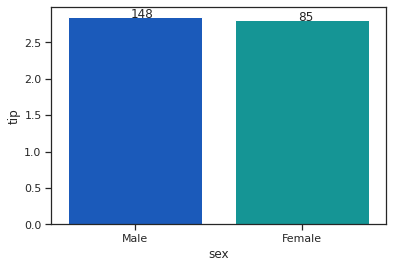

In [86]:
col = 'sex'
ax = sns.barplot(x=col, y='tip', data=tips2, palette = 'winter', ci=False)
for p, label in zip(ax.patches, tips2[col].value_counts().values):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.001))

## Hari ramainya pengunjung restaurant

Diperoleh hasil bahwa pelanggan ramai mengunjungi restaurant pada hari sabtu (saturday) di waktu dinner (makan malam).

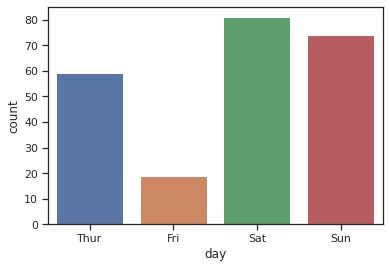

In [87]:
p = sns.countplot(x='day', data=tips2)

In [88]:
#Hari ramainya pengunjung restaurant berdasarkan jumlah meja yang dilayani 
tips2.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,59,59,59,59,59,59
Fri,19,19,19,19,19,19
Sat,81,81,81,81,81,81
Sun,74,74,74,74,74,74


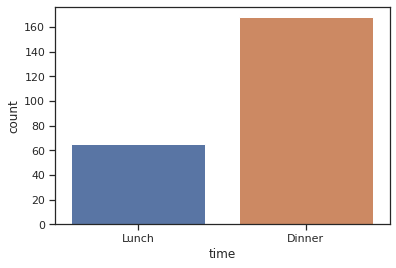

In [89]:
p = sns.countplot(tips2['time'], data=tips2)

## Hari yang terbaik untuk bekerja dan mendapatkan tip yang maksimum (jumlah dan persentasenya)

Diperoleh hasil bahwa hari terbaik untuk bekerja dan mendapatkan tip yang maksimum adalah pada hari minggu (sunday), Namun secara persentase perolehan tip yang paling tinggi sekitar 15%. 

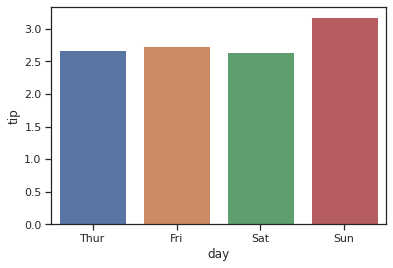

In [90]:
p = sns.barplot(x='day', y='tip', data=tips2, ci=False)

In [91]:
#Lets find out what is the best day to work – maximum tips (sum and percents)
df = tips2.groupby('day').sum() # sum per day
df.drop('size',inplace=True, axis=1) # sum of size column is not relevant
df['percent'] = df['tip'] / df['total_bill']*100 # add percents
df

#we can see that the tips are around 15% of the bill

,total_bill,tip,percent
day,,,
Thur,1024.32,157.28,15.354577
Fri,325.88,51.96,15.944519
Sat,1534.37,214.67,13.990758
Sun,1571.59,234.89,14.946010


## Meja yang paling banyak dilayani per hari

Diperoleh hasil bahwa meja yang paling banyak dipesan yaitu meja dengan size 2, pesanan meja ini konsisten sebagai pesanan yang paling tinggi di semua hari pada saat restaurant buka.

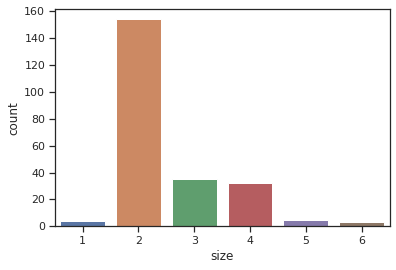

In [92]:
p = sns.countplot(tips2['size'], data=tips2)

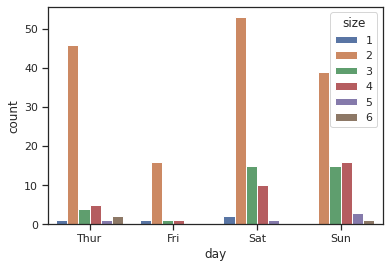

In [93]:
#Meja kecil (size 2) lebih baik untuk disajikan secara lebih banyak
#Tables per day per size:
p = sns.countplot(x='day', hue='size', data=tips2)

## Tabel groupby hari dan tabel size

Diperoleh hasil bahwa pesanan meja size 2 memberikan kontribusi yang cukup signifikan meningkatkan jumlah pendapatan restaurant dan tip bagi pelayannya. 

In [94]:
#Lets groupby day and table size:
df2 = tips2.groupby(['day','size']).sum()
df2['percent'] = df2['tip'] / df2['total_bill']*100
df2.dropna() # drop null rows

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         689.82  109.39  15.857760
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          56.85    9.20  16.182938
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         351.16   45.94  13.082356
     4         252.37   30.30  12.006181
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         424.82   61.08  14.377854
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

## Siapakah yang pesan banyak (dan memberikan tip banyak juga) ? Perokok atau bukan perokok?

Diperoleh hasil bahwa pelanggan yang tidak merokok adalah pelanggan yang paling banyak memesan (dan juga memberikan banyak tip).

In [95]:
#who eats more (and tips more)? smokers or non smokers?
df3 = tips2.groupby('smoker').sum()
df3['percent'] = df3['tip'] / df3['total_bill']*100
df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1815.19,254.81,212,14.037649
No,2640.97,403.99,376,15.297031


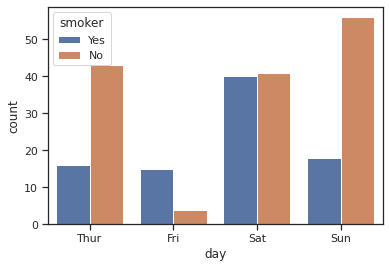

In [96]:
#Smokers or not? 
sns.countplot(x='day', hue='smoker' ,data=tips2)

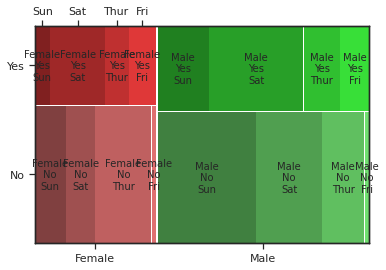

In [97]:
p = mosaic(tips2, ['sex','smoker','day'])

# Ringkasan hasil yang diperoleh atau rekomendasi yang diberikan untuk pemilik restaurant yaitu:

Insight:
- Pengunjung restaurant paling banyak memesan size 2, pesanan meja ini konsisten sebagai pesanan yang paling tinggi di semua hari pada saat restaurant buka.
- Pelanggan yang datang ke restaurant didominasi oleh golongan laki-laki
- Pelanggan yang paling banyak memberikan tip didominasi oleh golongan laki-laki
- Pelanggan ramai mengunjungi restaurant terjadi pada hari sabtu (saturday) di waktu dinner (makan malam)
- Hari terbaik untuk bekerja dan mendapatkan tip yang maksimum adalah pada hari minggu (sunday), Namun secara persentase perolehan tip yang paling tinggi sekitar 15%.
- Meja size 2 memberikan kontribusi yang cukup signifikan meningkatkan jumlah pendapatan restaurant dan tip bagi pelayannya (Lihat Tabel Groupby hari dan size).
- Pelanggan yang tidak merokok adalah pelanggan yang paling banyak memesan (dan juga memberikan banyak tip).


Rekomendasi:
- Size 2 dapat ditambahkan untuk memenuhi kebutuhan pengunjung restaurant
- Dekorasi restaurant bisa sesuatu yang berhubungan dengan couple
- Jumlah karyawan bisa dioptimalkan pada hari yang memang ramai pengunjung misalnya hari sabtu pada waktu dinner (makan malam). Oleh karena itu pekerja yang bekerja di hari yang pengunjungnya tidak terlalu padat dapat berpindah jam kerja.
- Jika ingin mendapatkan maksimum tip, pelayan restaurant dapat bekerja pada hari minggu (sunday)





---


# <center> Here For Project Machine Learning

---






---


# <center> Here For Project Machine Learning

---






---


# <center> Here For Project Machine Learning

---



# Sabar.. To Be Continue :)

## Data Preparation for Modelling

Dalam proses data preparation for modelling dilakukan transform and clean the data atau dengan kata lain sebelum membuat model, kita perlu merubah semua nilai kategori menjadi angka.

Caranya:
- Using update statements
- Using replace method
- Iterate over the rows
- Use dummy variables

### Using replace: 

Merubah nilai variabel sex dan smoker menjadi angka

In [98]:
tips2.replace({'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} , inplace=True)
tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


### Using dummy variables:

Nilai dalam kolom day adalah Thu, Fri, Sat, Sun, nilai tersebut dapat diubah menjadi 1,2,3,4. Namun, untuk mendapatkan model yang terbaik, akan lebih baik menggunakan variabel boolean. Hal tersebut dapat dilakukan dengan mengubah kolom day menjadi 4 kolom - satu dari masing-masing kolom day diisi dengan nilai 0 atau 1.

Cara: 
- Modul pandas, using get_dummies

In [99]:
days = pd.get_dummies(tips2['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
189,0,0,0,1
85,1,0,0,0
138,1,0,0,0
93,0,1,0,0
213,0,0,1,0


<!-- ### Optional  
Actually we can drop one of the columns without loosing data – for example if we drop column ‘Thur’ we know that index 135 is Thur because all other days are 0. It is also supported by the same function:

Sebenarnya kita dapat menghapus salah satu kolom tanpa kehilangan data - misalnya jika kita menghapus kolom 'Thur' kita tahu bahwa indeks 135 adalah Thur karena semua hari lainnya adalah 0. Ini juga didukung oleh fungsi yang sama: 

# days = pd.get_dummies(tips2['day'], drop_first=True)
# days.sample(6)

Do the same with time column and concat all data frames, Also we don’t need the day and size columns anymore so we drop them


Lakukan hal yang sama dengan kolom waktu dan gabungkan semua frame data, Selain itu, kami tidak memerlukan kolom hari dan ukuran lagi, jadi kami membuangnya

-->

## Menggabungkan Data

In [100]:
days = pd.get_dummies(tips2['day']) #,drop_first=True)
tips2 = pd.concat([tips2, days],axis=1)

times = pd.get_dummies(tips2['time']) #,drop_first=True)
tips2 = pd.concat([tips2, times], axis=1)

#tips2.drop(['day','time'], inplace=True, axis=1)
tips2.head()

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1,0,1
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,0,1,0,1
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,0,1,0,1


## Modelling 

- Metode yang digunakan: Multiple Linear Regression

<!-- ### Menyiapkan Data

X = tips2[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y = tips2[['tip']]

### Split data menjadi train dan test (70% dan 30%)

X_train, X_test , y_train , y_test = train_test_split(X, Y, test_size=0.3, random_state=26)
X_train.shape, X_test.shape , y_train.shape , y_test.shape


model.fit(X_train, y_train)
 -->


### Mendefinisikan Model

In [101]:
res = ols(formula='tip ~ size + C(sex) + C(smoker) + C(day) + C(time)', data=tips2).fit()
print(res.params)
print(res.summary())
# 1. F-Stat. 
#.2. Uji Koef model
#.3. R^2
#.4. Interpretasi Model
#.5. Durbin-Watson ==> Time Series?

Intercept            1.276228
C(sex)[T.1]          0.065300
C(smoker)[T.1]       0.245650
C(day)[T.Fri]       -0.215203
C(day)[T.Sat]       -0.590410
C(day)[T.Sun]       -0.193839
C(time)[T.Dinner]    0.521558
size                 0.531734
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     10.70
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.27e-11
Time:                        13:54:20   Log-Likelihood:                -315.82
No. Observations:                 233   AIC:                             647.6
Df Residuals:                     225   BIC:                             675.3
Df Model:                           7                                         
Covariance Type:            nonrob

### Melakukan Prediksi

<!-- predictions = model.predict(X_test)

Intercept = model.intercept_
Coefficients = model.coef_

We can now look at the predictions and compare it with y_test

We can draw a graph to see the difference distribution:

sns.distplot(y_test-predictions)

We can see from the graph that most of the times the predictions were correct (difference = 0). We can continue working on the model , adding data and play with the parameters
 -->


<!-- Jika ingin memprediksi data baru, misalnya:
- We have a 3 size table smoker male on friday lunch.

#['sex','smoker','size','Fri','Sat','Sun','Dinner']
myvals = np.array([0,1,3,1,0,0,0]).reshape(1,-1)
model.predict(myvals)

And the same table on dinner:

myvals = np.array([0,1,3,1,0,0,1]).reshape(1,-1)
model.predict(myvals) -->

## <center> Terimakasih Semoga Bermanfaat <center>

## <center> Raspiani (raspianiyani@gmail.com) <center>